In [1]:
import pandas as pd 
import numpy as np
import os
import datetime
import glob
from pathlib import Path

# Exploratory Data Analyis

Please unzip finaldata.zip in the data folder and make sure the csv is located in the data folder

In [2]:
# Now, our team loaded in our final DataFrame into Colab for EDA and analysis. 

# File path that this CSV file was inputted from was removed to maintain anonymity, as it was in our team's Google Drive..
data = pd.read_csv('./data/finaldata3.csv', low_memory=False)

In [3]:
# Return columns and their Datatypes.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323337 entries, 0 to 2323336
Data columns (total 47 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   WEEK            int64  
 2   AGE_GROUP       object 
 3   GENDER          object 
 4   RACE_ETHNICITY  object 
 5   EDUCATION       object 
 6   MARITAL_STATUS  object 
 7   HOUSEHOLD_SIZE  int64  
 8   RECVDVACC       float64
 9   GETVACC         float64
 10  YN1             int64  
 11  YN2             int64  
 12  YN3             int64  
 13  YN4             int64  
 14  YN5             int64  
 15  YN6             int64  
 16  YN7             int64  
 17  YN8             int64  
 18  YN9             int64  
 19  YN10            int64  
 20  YN11            int64  
 21  YNB1            int64  
 22  YNB2            int64  
 23  YNB3            int64  
 24  YNB4            int64  
 25  YNB5            int64  
 26  YNB6            int64  
 27  DATE            object 
 28  VACC        

In [4]:
# Return Value Counts for the VACC column.
data.VACC.value_counts()

Definitely        184806
Vaccinated        151025
Probably           59923
Probably NOT       34642
Definitely NOT     25850
Name: VACC, dtype: int64

In [5]:
# Subset to only include VACC rows which are not NA. We are only interested in those rows which actually express vaccine sentiment.
# Noting that this will exclude much data from weeks 1-21, as vaccine sentiment questions were not asked at this time. This is because the 
# vaccine was not yet available. 

data_vacc = data[data['RECVDVACC'].notna()]


In [6]:
# Return header of new, subsetted dataframe.
data_vacc.head(5)

,Unnamed: 0,WEEK,AGE_GROUP,GENDER,RACE_ETHNICITY,EDUCATION,MARITAL_STATUS,HOUSEHOLD_SIZE,RECVDVACC,GETVACC,...,INTEREST,DOWN,PRESCRIPT,MH_SVCS,MH_NOTGET,INCOME,EST_ST,PRIVHLTH,PUBHLTH,REGION
1864102,1864102,22,40 - 54,Female,White alone,Bachelor's degree or higher,Married,5,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Alabama,NaN,NaN,South
1864103,1864103,22,65 and above,Female,White alone,Bachelor's degree or higher,Others,2,2.0,1.0,...,More than Half the Days,More than Half the Days,No,No,No,"$50,000-74,999",Alabama,yes,yes,South
1864104,1864104,22,25 - 39,Male,White alone,Bachelor's degree or higher,Married,6,2.0,1.0,...,Several Days,Several Days,No,Yes,No,"$75,000-$99,000",Alabama,yes,no,South
1864105,1864105,22,40 - 54,Female,Other races,High school diploma or GED,Others,2,2.0,4.0,...,Not at all,More than Half the Days,No,No,No,"$100,000-$149,999",Washington,yes,no,West
1864106,1864106,22,25 - 39,Female,White alone,Bachelor's degree or higher,Married,2,2.0,1.0,...,Several Days,Several Days,Yes,No,No,"$150,000 and above",California,yes,no,West


In [7]:
# Our team next outputted the value counts for each of our variables in this dataset
for i in data_vacc:
    x = data_vacc[i].value_counts()
    print("Column name is:",i,"and it value is:",x)

Column name is: Unnamed: 0 and it value is: 2097152    1
2273025    1
2195813    1
2197860    1
2208099    1
          ..
2112685    1
2110636    1
2100395    1
2098346    1
2099199    1
Name: Unnamed: 0, Length: 459235, dtype: int64
Column name is: WEEK and it value is: 23    80567
26    78306
25    77788
24    77122
27    77104
22    68348
Name: WEEK, dtype: int64
Column name is: AGE_GROUP and it value is: 65 and above    131333
40 - 54         123845
55 - 64          95841
25 - 39          91978
18 - 24          16238
Name: AGE_GROUP, dtype: int64
Column name is: GENDER and it value is: Female    274798
Male      184437
Name: GENDER, dtype: int64
Column name is: RACE_ETHNICITY and it value is: White alone    343698
Hispanic        44303
Black alone     33301
Asian alone     21955
Other races     15978
Name: RACE_ETHNICITY, dtype: int64
Column name is: EDUCATION and it value is: Bachelor's degree or higher        247873
Some college/associate's degree    148370
High school diploma or

Our team next moved on to performing EDA using Seaborn. These graphs would help to determine relationships, and would be used as a guideline for creating our final Tableau Dashboard.

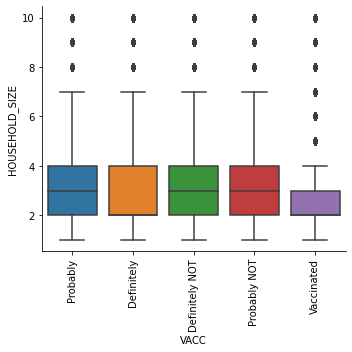

In [8]:
# Import Seaborn and MatPlotLib. 
import seaborn as sns
from matplotlib import pyplot as plt

# Analyze Vaccine sentiment by Household Size.
box = sns.catplot(x="VACC", y="HOUSEHOLD_SIZE", kind = 'box', data=data_vacc)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in box.axes.flat]

plt.tight_layout()

# We observe that those who have already been vaccinated come from a slightly smaller household. However, there does not appear to be 
# a connection between other listed vaccine sentiments and household size. 

In [9]:
# Next, our team used the Pandas 'Group by' Command to discern the relationship for 'GENDER'.

# First, use Pandas Groupby command to group by Gender the percent that responded to each Vaccine category.
gender = data_vacc.groupby('GENDER')['VACC'].value_counts(normalize=True)
gender = gender.mul(100).rename('Percent').reset_index()

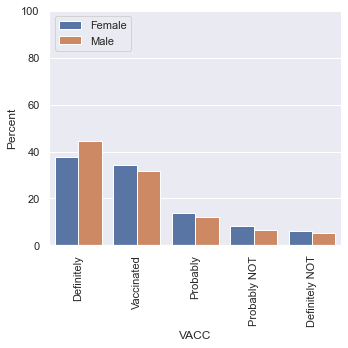

In [10]:
# Next, we graphed these percents using Seaborn. 

sns.set_theme()

gender_graph = sns.catplot(x='VACC', y='Percent', hue='GENDER', kind='bar', legend=False, data=gender)
gender_graph.ax.set_ylim(0,100)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in gender_graph.axes.flat]
plt.tight_layout()

plt.legend(loc='upper left')
plt.show()

# We observe that, of our respondents, a slightly higher percent of females indicated that they would probably not, or definitely not, take the vaccine.

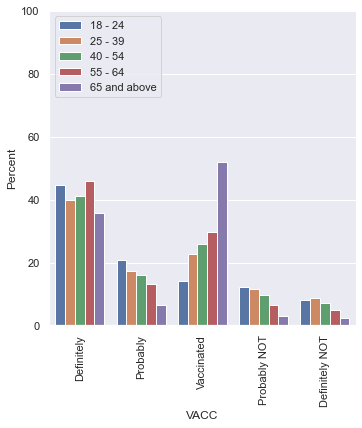

In [11]:
# Next, let's run some testing with the Pandas 'Group by' Command to discern the relationship for 'Age'.

# First, use Pandas Groupby command to group by Age the percent that responded to each Vaccine category.
age = data_vacc.groupby('AGE_GROUP')['VACC'].value_counts(normalize=True)
age = age.mul(100).rename('Percent').reset_index()

# Next, Graph these percents using Seaborn. 
age_graph = sns.catplot(x='VACC', y='Percent', hue='AGE_GROUP', kind='bar', legend=False, data=age)
age_graph.ax.set_ylim(0,100)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in age_graph.axes.flat]

plt.legend(loc='upper left')
plt.show()

# We observe the relationship that we expected. Of our survey respondents, those 65+ had received the vaccine at a much higher percent rate than other age groups.

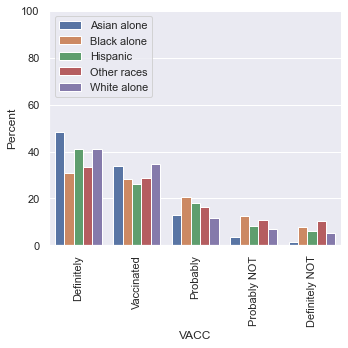

In [12]:
# Next, let's run some testing with the Pandas 'Group by' Command to discern the relationship for 'Ethnicity'.

# First, use Pandas Groupby command to group by Ethnicity the percent that responded to each Vaccine category.
ethnicity = data_vacc.groupby('RACE_ETHNICITY')['VACC'].value_counts(normalize=True)
ethnicity = ethnicity.mul(100).rename('Percent').reset_index()

# Next, Graph these percents using Seaborn. 
ethnicity_graph = sns.catplot(x='VACC', y='Percent', hue='RACE_ETHNICITY', kind='bar', legend=False, data=ethnicity)
ethnicity_graph.ax.set_ylim(0,100)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in ethnicity_graph.axes.flat]
plt.tight_layout()

plt.legend(loc='upper left')
plt.show()

# Overall, we observe that Asian people and White people were more likely to indicate trust in the vaccine. Black Americans were most likely to indicate that they would not take the vaccine.
# We also note a disparity in those who have already been vaccinated; white and asian people among our survey respondents had already been vaccinated at a higher rate.


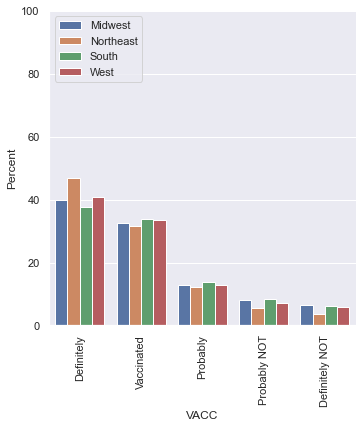

In [13]:
# Next, let's run some testing with the Pandas 'Group by' Command to discern the relationship for 'REGION'.

# First, use Pandas Groupby command to group by U.S Region the percent that responded to each Vaccine category.
region = data_vacc.groupby('REGION')['VACC'].value_counts(normalize=True)
region = region.mul(100).rename('Percent').reset_index()

# Next, Graph these percents using Seaborn. 
region_graph = sns.catplot(x='VACC', y='Percent', hue='REGION', kind='bar', legend=False, data=region)
region_graph.ax.set_ylim(0,100)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in region_graph.axes.flat]

plt.legend(loc='upper left')
plt.show()

# We observe that people in the northeast have the least amount of distrust in the vaccine, followed by the west.
# People are more distrustful of the Vaccine in the south & midwest.

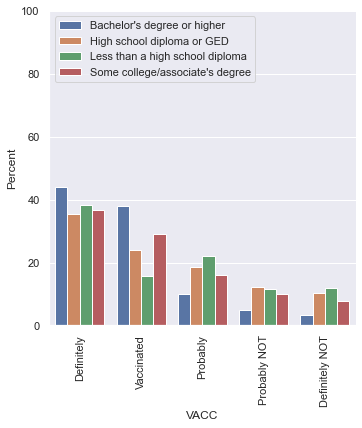

In [14]:
# Next, let's run some testing with the Pandas 'Group by' Command to discern the relationship for 'Education'.

# First, use Pandas Groupby command to group by Education the percent that responded to each Vaccine category.
education = data_vacc.groupby('EDUCATION')['VACC'].value_counts(normalize=True)
education = education.mul(100).rename('Percent').reset_index()

# Next, Graph these percents using Seaborn. 
education_graph = sns.catplot(x='VACC', y='Percent', hue='EDUCATION', kind='bar', legend=False, data=education)
education_graph.ax.set_ylim(0,100)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in education_graph.axes.flat]

plt.legend(loc='upper left')
plt.show()

# We observe that those with less than a high school degree indicated the most distrust in the vaccine. Those in those subgroup were also much less likely to have already been vaccinated.

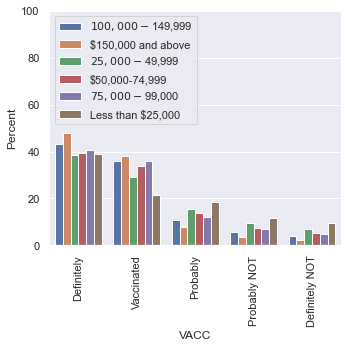

In [15]:
# Next, let's run some testing with the Pandas 'Group by' Command to discern the relationship for 'Income'.

# First, use Pandas Groupby command to group by Income the percent that responded to each Vaccine category.
income = data_vacc.groupby('INCOME')['VACC'].value_counts(normalize=True)
income = income.mul(100).rename('Percent').reset_index()

# Next, Graph these percents using Seaborn. 
income_graph = sns.catplot(x='VACC', y='Percent', hue='INCOME', kind='bar', legend=False, data=income)
income_graph.ax.set_ylim(0,100)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in income_graph.axes.flat]
plt.tight_layout()

plt.legend(loc='upper left')
plt.show()

# For our income brackets, we note that those who make less than $25K are much less likely to have already been vaccinated, and also exhibit a higher distrust in the vaccine.
# For those with lower incomes, they indicated they would probably not or definitely not take the vaccine in higher amounts.

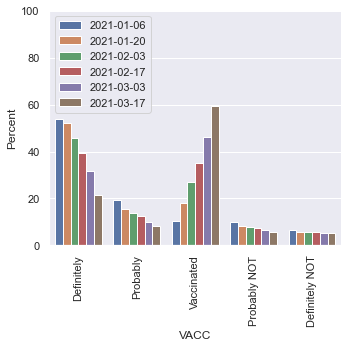

In [16]:
# Lastly, we observe that a trend over time in the survey dates that we analyzed. In general, people are becoming 
# more trustful of the vaccine as more people have received it. 

# First, use Pandas Groupby command to group by date the percent that responded to each Vaccine category.
date = data_vacc.groupby('DATE')['VACC'].value_counts(normalize=True)
date = date.mul(100).rename('Percent').reset_index()

# Next, Graph these percents using Seaborn. 
date_graph = sns.catplot(x='VACC', y='Percent', hue='DATE', kind='bar', legend=False, data=date)
date_graph.ax.set_ylim(0,100)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in date_graph.axes.flat]
plt.tight_layout()

plt.legend(loc='upper left')
plt.show()

# We see a huge leap in vaccinations among the dates that we have surveyed. We also see that the percent of people exhibiting distrust in the vaccine 
# has also steadily declined over time.

<ipython-input-17-3daa26a3d840>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  date_lineplot.set_xticklabels(date_lineplot.get_xticklabels(), rotation=45, ha="right")


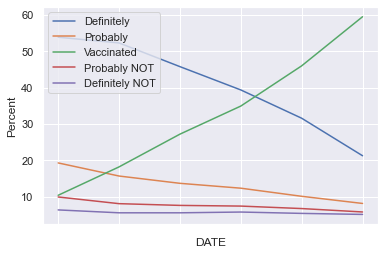

In [17]:
# Let's do an line graph to observe this trend over time a little more clearly:

sns.set_theme()

date_lineplot = sns.lineplot(x="DATE", y="Percent",
             hue="VACC", data=date)
date_lineplot.set_xticklabels(date_lineplot.get_xticklabels(), rotation=45, ha="right")

plt.legend(loc='upper left')
plt.show()

# We observe that distrust has been falling steadily over time as vaccinations increase among our survey respondents.

# A higher percent of respondents have indicated that they have been vaccinated over the last several months, while distrust in the vaccine has been steadily falling.

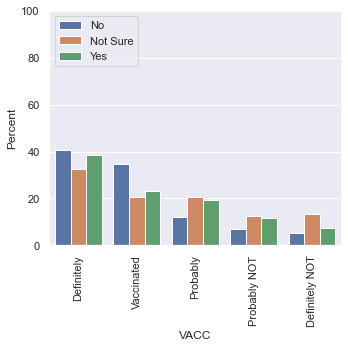

In [18]:
# Now - what about those who have already had Covid? Are they more likely to distrust the vaccine?

# First, use Pandas Groupby command to group by those who have already had Covid, and the percent that responded to each Vaccine category.
hadcovid = data_vacc.groupby('HADCOVID')['VACC'].value_counts(normalize=True)
hadcovid = hadcovid.mul(100).rename('Percent').reset_index()

# Next, Graph these percents using Seaborn. 
hadcovid_graph = sns.catplot(x='VACC', y='Percent', hue='HADCOVID', kind='bar', legend=False, data=hadcovid)
hadcovid_graph.ax.set_ylim(0,100)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in hadcovid_graph.axes.flat]
plt.tight_layout()

plt.legend(loc='upper left')
plt.show()

# We observe that those who have had Covid - or who are not sure if they've had Covid - are less likely to take a vaccine. They also are much less likely to have already been
# vaccinated.

# Reasons to distrust the Vaccine Analysis

In [19]:
Reason_ColList = ['YN1','YN2','YN3','YN4','YN5','YN6','YN7','YN8','YN9','YN10','YN11','YNB1','YNB2','YNB3','YNB4','YNB5','YNB6']

# Let's list the number of respondents for each question that indicated it was a reason why they were distrustful of the vaccine.
for i in Reason_ColList:
  x = (data_vacc[i] == 1).sum()
  print("Column name is:",i,"and the number of people indicating this as a reason to distrust the vaccine was:",x)


# We observe the most popular reasoning choices for not taking the vaccines are questions WHYNOT1, WHYNOT6, WHYNOT7, WHYNOT9, & WHYNOT10. 

Column name is: YN1 and the number of people indicating this as a reason to distrust the vaccine was: 62674
Column name is: YN2 and the number of people indicating this as a reason to distrust the vaccine was: 23422
Column name is: YN3 and the number of people indicating this as a reason to distrust the vaccine was: 16871
Column name is: YN4 and the number of people indicating this as a reason to distrust the vaccine was: 11292
Column name is: YN5 and the number of people indicating this as a reason to distrust the vaccine was: 8224
Column name is: YN6 and the number of people indicating this as a reason to distrust the vaccine was: 57937
Column name is: YN7 and the number of people indicating this as a reason to distrust the vaccine was: 35991
Column name is: YN8 and the number of people indicating this as a reason to distrust the vaccine was: 7155
Column name is: YN9 and the number of people indicating this as a reason to distrust the vaccine was: 25464
Column name is: YN10 and the n

In [20]:
# WHYNOT1 value counts.
data_vacc.YN1.value_counts()

0    396561
1     62674
Name: YN1, dtype: int64

Text(0.5, 1.0, 'Percent (By Age Group) who listed WHYNOT1 as a reason')

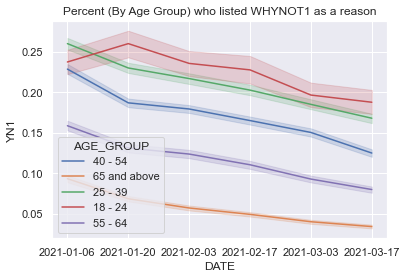

In [21]:
# Now, let's break it down by Age Group:
sns.lineplot(data=data_vacc, x="DATE", y="YN1", hue="AGE_GROUP").set_title('Percent (By Age Group) who listed WHYNOT1 as a reason')

# We again observe that distrust is overall declining over time, for all age groups.

# Analysis on Interested Subgroups: Why is there Vaccine Distrust?

# Subset of Interest: Wyoming

In [22]:
# Example: From our EDA, we observe that Wyoming still has a high percent of survey respondents who don't trust the
# vaccine. 25% from our latest survey data. Use Tableau & above EDA to identify groups of interest.

In [23]:
# Perform subset by Wyoming and latest date to determine the latest reasons why people still distrust the vaccine.
data_wy = data_vacc[(data_vacc['EST_ST'] == 'Wyoming') & (data_vacc['DATE'] == '2021-03-17')]

In [24]:
Reason_ColList = ['YN1','YN2','YN3','YN4','YN5','YN6','YN7','YN8','YN9','YN10','YN11','YNB1','YNB2','YNB3','YNB4','YNB5','YNB6']

# Let's list the number of respondents for each question that indicated it was a reason why they were distrustful of the vaccine.
for i in Reason_ColList:
  x = (data_wy[i] == 1).sum()
  print("Column name is:",i,"and the number of people indicating this as a reason to distrust the vaccine was:",x)

# Here we observe that the prevailing reasons why the vaccine is not taken in Wyoming are reasons YN1, YN6, and YN9.
# We could target policy/ads that address these concerns to raise trust in the vaccine.

# At this point, our team took our data to Tableau to create visualizations for this distrust.

Column name is: YN1 and the number of people indicating this as a reason to distrust the vaccine was: 108
Column name is: YN2 and the number of people indicating this as a reason to distrust the vaccine was: 40
Column name is: YN3 and the number of people indicating this as a reason to distrust the vaccine was: 57
Column name is: YN4 and the number of people indicating this as a reason to distrust the vaccine was: 21
Column name is: YN5 and the number of people indicating this as a reason to distrust the vaccine was: 23
Column name is: YN6 and the number of people indicating this as a reason to distrust the vaccine was: 93
Column name is: YN7 and the number of people indicating this as a reason to distrust the vaccine was: 52
Column name is: YN8 and the number of people indicating this as a reason to distrust the vaccine was: 14
Column name is: YN9 and the number of people indicating this as a reason to distrust the vaccine was: 67
Column name is: YN10 and the number of people indicati

# Subset of Interest: Those who have already had Covid

In [25]:
# From our EDA, we observe that those who have already had Covid are more likely to distrust, or be less likely to take, the vaccine.

In [26]:
# Perform subset to return people who have had Covid in the most recent survey.
data_hadcovid = data_vacc[(data_vacc['HADCOVID'] == 'Yes') & (data_vacc['DATE'] == '2021-03-17')]

In [27]:
Reason_ColList = ['YN1','YN2','YN3','YN4','YN5','YN6','YN7','YN8','YN9','YN10','YN11','YNB1','YNB2','YNB3','YNB4','YNB5','YNB6']

# Let's list the number of respondents for each question that indicated it was a reason why they were distrustful of the vaccine.
for i in Reason_ColList:
  x = (data_hadcovid[i] == 1).sum()
  print("Column name is:",i,"and the number of people indicating this as a reason to distrust the vaccine was:",x)

# Here we observe that the prevailing reasons why the vaccine is not taken among people who have had Covid are reasons YN1, YN6, YN7, YN11, YN9. 


Column name is: YN1 and the number of people indicating this as a reason to distrust the vaccine was: 1344
Column name is: YN2 and the number of people indicating this as a reason to distrust the vaccine was: 450
Column name is: YN3 and the number of people indicating this as a reason to distrust the vaccine was: 475
Column name is: YN4 and the number of people indicating this as a reason to distrust the vaccine was: 256
Column name is: YN5 and the number of people indicating this as a reason to distrust the vaccine was: 170
Column name is: YN6 and the number of people indicating this as a reason to distrust the vaccine was: 1197
Column name is: YN7 and the number of people indicating this as a reason to distrust the vaccine was: 637
Column name is: YN8 and the number of people indicating this as a reason to distrust the vaccine was: 79
Column name is: YN9 and the number of people indicating this as a reason to distrust the vaccine was: 610
Column name is: YN10 and the number of people

# Subset: By Gender

In [28]:
# Perform subset to return people by gender.
data_female = data_vacc[(data_vacc['GENDER'] == 'Female') & (data_vacc['DATE'] == '2021-03-17')]
data_male = data_vacc[(data_vacc['GENDER'] == 'Male') & (data_vacc['DATE'] == '2021-03-17')]

In [29]:
Reason_ColList = ['YN1','YN2','YN3','YN4','YN5','YN6','YN7','YN8','YN9','YN10','YN11','YNB1','YNB2','YNB3','YNB4','YNB5','YNB6']
pct_female =[]
# Let's list the number of respondents for each question that indicated it was a reason why they were distrustful of the vaccine.
for i in Reason_ColList:
  x = (data_female[i] == 1).sum()
  pct = x/data_female.shape[0]
  pct = round(pct, 3)
  pct_female.append(pct)
  print("Column name is:",i,"and the number of people indicating this as a reason to distrust the vaccine was:",x)
print(pct_female)

# Here we observe that the prevailing reasons why the vaccine is not taken among people identified as female are YN1, YN6, YN9, YN7.
# Here we observe that the prevailing reasons why the vaccine is distrusted among people identified as female is YNB2. 

Column name is: YN1 and the number of people indicating this as a reason to distrust the vaccine was: 4988
Column name is: YN2 and the number of people indicating this as a reason to distrust the vaccine was: 1642
Column name is: YN3 and the number of people indicating this as a reason to distrust the vaccine was: 1315
Column name is: YN4 and the number of people indicating this as a reason to distrust the vaccine was: 918
Column name is: YN5 and the number of people indicating this as a reason to distrust the vaccine was: 578
Column name is: YN6 and the number of people indicating this as a reason to distrust the vaccine was: 4366
Column name is: YN7 and the number of people indicating this as a reason to distrust the vaccine was: 2188
Column name is: YN8 and the number of people indicating this as a reason to distrust the vaccine was: 375
Column name is: YN9 and the number of people indicating this as a reason to distrust the vaccine was: 2266
Column name is: YN10 and the number of p

In [30]:
# Now, let's perform this analysis for males.

Reason_ColList = ['YN1','YN2','YN3','YN4','YN5','YN6','YN7','YN8','YN9','YN10','YN11','YNB1','YNB2','YNB3','YNB4','YNB5','YNB6']
pct_male =[]
# Let's list the number of respondents for each question that indicated it was a reason why they were distrustful of the vaccine.
for i in Reason_ColList:
  x = (data_male[i] == 1).sum()
  pct = x/data_male.shape[0]
  pct = round(pct, 3)
  pct_male.append(pct)
  print("Column name is:",i,"and the number of people indicating this as a reason to distrust the vaccine was:",x)
print(pct_male)

# Here we observe that the prevailing reasons why the vaccine is not taken among people identified as male are YN1, YN6, YN7, YN10.
# Here we observe that the prevailing reasons why the vaccine is distrusted among people identified as male is YNB2. 

Column name is: YN1 and the number of people indicating this as a reason to distrust the vaccine was: 2644
Column name is: YN2 and the number of people indicating this as a reason to distrust the vaccine was: 988
Column name is: YN3 and the number of people indicating this as a reason to distrust the vaccine was: 1348
Column name is: YN4 and the number of people indicating this as a reason to distrust the vaccine was: 623
Column name is: YN5 and the number of people indicating this as a reason to distrust the vaccine was: 353
Column name is: YN6 and the number of people indicating this as a reason to distrust the vaccine was: 2321
Column name is: YN7 and the number of people indicating this as a reason to distrust the vaccine was: 1532
Column name is: YN8 and the number of people indicating this as a reason to distrust the vaccine was: 248
Column name is: YN9 and the number of people indicating this as a reason to distrust the vaccine was: 1417
Column name is: YN10 and the number of pe

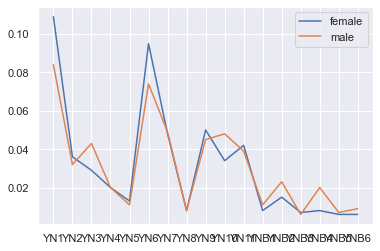

In [31]:
# Let's plot this relationship between men and women. We note that the reasons in which these groups distrust COVID are very similar, as seen by the similar trend in the line plot below.

fig, axs = plt.subplots()
axs.plot(Reason_ColList, pct_female, label="female")
axs.plot(Reason_ColList, pct_male, label="male")
axs.legend()

plt.show()

There're more males that don't take the vaccines because they don't trust the gov & don't believe COVID-19 is a serious illness --> Males appear to be more skeptical.

# Subset: By Ethnicity

In [32]:
# Perform subset to return people by race.
data_black = data_vacc[(data_vacc['RACE_ETHNICITY'] == 'Black alone') & (data_vacc['DATE'] == '2021-03-17')]
data_hisp = data_vacc[(data_vacc['RACE_ETHNICITY'] == 'Hispanic') & (data_vacc['DATE'] == '2021-03-17')]

In [33]:
Reason_ColList = ['YN1','YN2','YN3','YN4','YN5','YN6','YN7','YN8','YN9','YN10','YN11','YNB1','YNB2','YNB3','YNB4','YNB5','YNB6']
pct_black =[]
# Let's list the number of respondents for each question that indicated it was a reason why they were distrustful of the vaccine.
for i in Reason_ColList:
  x = (data_black[i] == 1).sum()
  pct = x/data_black.shape[0]
  pct = round(pct, 3)
  pct_black.append(pct)
  print("Column name is:",i,"and the number of people indicating this as a reason to distrust the vaccine was:",x)
print(pct_black)

# Here we observe that the prevailing reasons why the vaccine is not taken among people identified as black are YN1, YN6, YN2
# Here we observe that the prevailing reasons why the vaccine is distrusted among people identified as black is YNB1. 


Column name is: YN1 and the number of people indicating this as a reason to distrust the vaccine was: 815
Column name is: YN2 and the number of people indicating this as a reason to distrust the vaccine was: 271
Column name is: YN3 and the number of people indicating this as a reason to distrust the vaccine was: 146
Column name is: YN4 and the number of people indicating this as a reason to distrust the vaccine was: 168
Column name is: YN5 and the number of people indicating this as a reason to distrust the vaccine was: 81
Column name is: YN6 and the number of people indicating this as a reason to distrust the vaccine was: 785
Column name is: YN7 and the number of people indicating this as a reason to distrust the vaccine was: 234
Column name is: YN8 and the number of people indicating this as a reason to distrust the vaccine was: 64
Column name is: YN9 and the number of people indicating this as a reason to distrust the vaccine was: 360
Column name is: YN10 and the number of people in

In [34]:
Reason_ColList = ['YN1','YN2','YN3','YN4','YN5','YN6','YN7','YN8','YN9','YN10','YN11','YNB1','YNB2','YNB3','YNB4','YNB5','YNB6']
pct_hisp =[]
# Let's list the number of respondents for each question that indicated it was a reason why they were distrustful of the vaccine.
for i in Reason_ColList:
  x = (data_hisp[i] == 1).sum()
  pct = x/data_hisp.shape[0]
  pct = round(pct, 3)
  pct_hisp.append(pct)
  print("Column name is:",i,"and the number of people indicating this as a reason to distrust the vaccine was:",x)
print(pct_hisp)

# Here we observe that the prevailing reasons why the vaccine is not taken among people identified as hispanic are YN1, and YN6.
# Here we observe that the prevailing reasons why the vaccine is distrusted among people identified as hispanic is YNB2. 


Column name is: YN1 and the number of people indicating this as a reason to distrust the vaccine was: 880
Column name is: YN2 and the number of people indicating this as a reason to distrust the vaccine was: 321
Column name is: YN3 and the number of people indicating this as a reason to distrust the vaccine was: 243
Column name is: YN4 and the number of people indicating this as a reason to distrust the vaccine was: 168
Column name is: YN5 and the number of people indicating this as a reason to distrust the vaccine was: 114
Column name is: YN6 and the number of people indicating this as a reason to distrust the vaccine was: 792
Column name is: YN7 and the number of people indicating this as a reason to distrust the vaccine was: 440
Column name is: YN8 and the number of people indicating this as a reason to distrust the vaccine was: 108
Column name is: YN9 and the number of people indicating this as a reason to distrust the vaccine was: 363
Column name is: YN10 and the number of people 

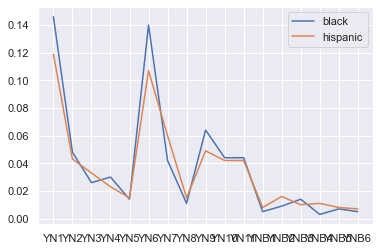

In [35]:
# Among our black and hispanic respondents, we observe that the reasons in which the groups distrust the vaccine are similar; we also observe that general distrust of the 
# vaccine is higher among black respondents.

fig, axs = plt.subplots()
axs.plot(Reason_ColList, pct_black, label="black")
axs.plot(Reason_ColList, pct_hisp, label="hispanic")
axs.legend()

plt.show()

Between Black and Hispanic survey respondents, more black people who indicated that they won't take vaccine did so because they don't trust the vaccine itself and plan to wait.

# Subset: By age

In [36]:
# Perform subset to return people by age.
data_1824 = data_vacc[(data_vacc['AGE_GROUP'] == '18 - 24') & (data_vacc['DATE'] == '2021-03-17')]
data_2539 = data_vacc[(data_vacc['AGE_GROUP'] == '25 - 39') & (data_vacc['DATE'] == '2021-03-17')]

In [37]:
Reason_ColList = ['YN1','YN2','YN3','YN4','YN5','YN6','YN7','YN8','YN9','YN10','YN11','YNB1','YNB2','YNB3','YNB4','YNB5','YNB6']
pct_1824 =[]
# Let's list the number of respondents for each question that indicated it was a reason why they were distrustful of the vaccine.
for i in Reason_ColList:
  x = (data_1824[i] == 1).sum()
  pct = x/data_1824.shape[0]
  pct = round(pct, 3)
  pct_1824.append(pct)
  print("Column name is:",i,"and the number of people indicating this as a reason to distrust the vaccine was:",x)
print(pct_1824)

# Here we observe that the prevailing reasons why the vaccine is not taken among people from 18 to 24 are YN1, YN6, YN7
# Here we observe that the prevailing reasons why the vaccine is distrusted among people from 18 to 24 is YNB2. 


Column name is: YN1 and the number of people indicating this as a reason to distrust the vaccine was: 469
Column name is: YN2 and the number of people indicating this as a reason to distrust the vaccine was: 202
Column name is: YN3 and the number of people indicating this as a reason to distrust the vaccine was: 221
Column name is: YN4 and the number of people indicating this as a reason to distrust the vaccine was: 99
Column name is: YN5 and the number of people indicating this as a reason to distrust the vaccine was: 64
Column name is: YN6 and the number of people indicating this as a reason to distrust the vaccine was: 470
Column name is: YN7 and the number of people indicating this as a reason to distrust the vaccine was: 341
Column name is: YN8 and the number of people indicating this as a reason to distrust the vaccine was: 89
Column name is: YN9 and the number of people indicating this as a reason to distrust the vaccine was: 222
Column name is: YN10 and the number of people ind

In [38]:
Reason_ColList = ['YN1','YN2','YN3','YN4','YN5','YN6','YN7','YN8','YN9','YN10','YN11','YNB1','YNB2','YNB3','YNB4','YNB5','YNB6']
pct_2539 =[]
# Let's list the number of respondents for each question that indicated it was a reason why they were distrustful of the vaccine.
for i in Reason_ColList:
  x = (data_2539[i] == 1).sum()
  pct = x/data_2539.shape[0]
  pct = round(pct, 3)
  pct_2539.append(pct)
  print("Column name is:",i,"and the number of people indicating this as a reason to distrust the vaccine was:",x)
print(pct_2539)
# Here we observe that the prevailing reasons why the vaccine is not taken among people from 25 to 39 are YN1, YN6, YN7
# Here we observe that the prevailing reasons why the vaccine is distrusted among people from 25 to 39 is YNB2. 


Column name is: YN1 and the number of people indicating this as a reason to distrust the vaccine was: 2466
Column name is: YN2 and the number of people indicating this as a reason to distrust the vaccine was: 862
Column name is: YN3 and the number of people indicating this as a reason to distrust the vaccine was: 919
Column name is: YN4 and the number of people indicating this as a reason to distrust the vaccine was: 471
Column name is: YN5 and the number of people indicating this as a reason to distrust the vaccine was: 287
Column name is: YN6 and the number of people indicating this as a reason to distrust the vaccine was: 2194
Column name is: YN7 and the number of people indicating this as a reason to distrust the vaccine was: 1363
Column name is: YN8 and the number of people indicating this as a reason to distrust the vaccine was: 216
Column name is: YN9 and the number of people indicating this as a reason to distrust the vaccine was: 1137
Column name is: YN10 and the number of peo

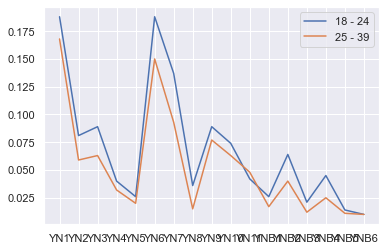

In [39]:
# We observe a higher distrust among 18-24 year olds, but again observe similar trends between our analyzed age brackets.

fig, axs = plt.subplots()
axs.plot(Reason_ColList, pct_1824, label="18 - 24")
axs.plot(Reason_ColList, pct_2539, label="25 - 39")
axs.legend()

plt.show()

Younger people are overall more skeptical about the vaccines.

# By number of people in a household

In [40]:
# Perform subset to return people by number of people in a household.
data_smallhsh = data_vacc[(data_vacc['HOUSEHOLD_SIZE'] <= 4) & (data_vacc['DATE'] == '2021-03-17')]


In [41]:
Reason_ColList = ['YN1','YN2','YN3','YN4','YN5','YN6','YN7','YN8','YN9','YN10','YN11','YNB1','YNB2','YNB3','YNB4','YNB5','YNB6']

# Let's list the number of respondents for each question that indicated it was a reason why they were distrustful of the vaccine.
for i in Reason_ColList:
  x = (data_smallhsh[i] == 1).sum()
  print("Column name is:",i,"and the number of people indicating this as a reason to distrust the vaccine was:",x)
# Here we observe that the prevailing reasons why the vaccine is not taken among people from households under 4 people are YN1, YN6, YN7, YN11
# Here we observe that the prevailing reasons why the vaccine is distrusted among people from households under 4 people 25 to 39 is YNB2. 


Column name is: YN1 and the number of people indicating this as a reason to distrust the vaccine was: 6252
Column name is: YN2 and the number of people indicating this as a reason to distrust the vaccine was: 2131
Column name is: YN3 and the number of people indicating this as a reason to distrust the vaccine was: 2126
Column name is: YN4 and the number of people indicating this as a reason to distrust the vaccine was: 1260
Column name is: YN5 and the number of people indicating this as a reason to distrust the vaccine was: 767
Column name is: YN6 and the number of people indicating this as a reason to distrust the vaccine was: 5460
Column name is: YN7 and the number of people indicating this as a reason to distrust the vaccine was: 3041
Column name is: YN8 and the number of people indicating this as a reason to distrust the vaccine was: 501
Column name is: YN9 and the number of people indicating this as a reason to distrust the vaccine was: 2995
Column name is: YN10 and the number of 

# By income

In [42]:
# Perform subset to return people by income.
data_lessthan25g = data_vacc[(data_vacc['INCOME'] == 'Less than $25,000') & (data_vacc['DATE'] == '2021-03-17')]

In [43]:
Reason_ColList = ['YN1','YN2','YN3','YN4','YN5','YN6','YN7','YN8','YN9','YN10','YN11','YNB1','YNB2','YNB3','YNB4','YNB5','YNB6']

# Let's list the number of respondents for each question that indicated it was a reason why they were distrustful of the vaccine.
for i in Reason_ColList:
  x = (data_lessthan25g[i] == 1).sum()
  print("Column name is:",i,"and the number of people indicating this as a reason to distrust the vaccine was:",x)
# Here we observe that the prevailing reasons why the vaccine is not taken among people with income less than $25,000 are YN1, YN9, YN10, YN11
# Here we observe that the prevailing reasons why the vaccine is distrusted among people with income less than $25,000 is YNB1. 


Column name is: YN1 and the number of people indicating this as a reason to distrust the vaccine was: 861
Column name is: YN2 and the number of people indicating this as a reason to distrust the vaccine was: 338
Column name is: YN3 and the number of people indicating this as a reason to distrust the vaccine was: 263
Column name is: YN4 and the number of people indicating this as a reason to distrust the vaccine was: 205
Column name is: YN5 and the number of people indicating this as a reason to distrust the vaccine was: 138
Column name is: YN6 and the number of people indicating this as a reason to distrust the vaccine was: 741
Column name is: YN7 and the number of people indicating this as a reason to distrust the vaccine was: 351
Column name is: YN8 and the number of people indicating this as a reason to distrust the vaccine was: 139
Column name is: YN9 and the number of people indicating this as a reason to distrust the vaccine was: 457
Column name is: YN10 and the number of people 

# By Education

In [44]:
# Perform subset to return people by education.
data_highschool = data_vacc[(data_vacc['EDUCATION'] == 'High school diploma or GED') & (data_vacc['DATE'] == '2021-03-17')]
data_lesshighschool = data_vacc[(data_vacc['EDUCATION'] == 'Less than a high school diploma') & (data_vacc['DATE'] == '2021-03-17')]

In [45]:
Reason_ColList = ['YN1','YN2','YN3','YN4','YN5','YN6','YN7','YN8','YN9','YN10','YN11','YNB1','YNB2','YNB3','YNB4','YNB5','YNB6']
pct_high =[]
# Let's list the number of respondents for each question that indicated it was a reason why they were distrustful of the vaccine.
for i in Reason_ColList:
  x = (data_highschool[i] == 1).sum()
  pct = x/data_highschool.shape[0]
  pct = round(pct, 3)
  pct_high.append(pct)
  print("Column name is:",i,"and the number of people indicating this as a reason to distrust the vaccine was:",x)
print(pct_high)
# Here we observe that the prevailing reasons why the vaccine is not taken among people with a high school diploma or GED are YN1, YN6, YN9
# Here we observe that the prevailing reasons why the vaccine is distrusted among people with a high school diploma or GED is YNB2. 


Column name is: YN1 and the number of people indicating this as a reason to distrust the vaccine was: 1307
Column name is: YN2 and the number of people indicating this as a reason to distrust the vaccine was: 461
Column name is: YN3 and the number of people indicating this as a reason to distrust the vaccine was: 445
Column name is: YN4 and the number of people indicating this as a reason to distrust the vaccine was: 282
Column name is: YN5 and the number of people indicating this as a reason to distrust the vaccine was: 168
Column name is: YN6 and the number of people indicating this as a reason to distrust the vaccine was: 1147
Column name is: YN7 and the number of people indicating this as a reason to distrust the vaccine was: 564
Column name is: YN8 and the number of people indicating this as a reason to distrust the vaccine was: 154
Column name is: YN9 and the number of people indicating this as a reason to distrust the vaccine was: 721
Column name is: YN10 and the number of peopl

In [46]:
Reason_ColList = ['YN1','YN2','YN3','YN4','YN5','YN6','YN7','YN8','YN9','YN10','YN11','YNB1','YNB2','YNB3','YNB4','YNB5','YNB6']
pct_lesshighschool =[]
# Let's list the number of respondents for each question that indicated it was a reason why they were distrustful of the vaccine.
for i in Reason_ColList:
  x = (data_lesshighschool[i] == 1).sum()
  pct = x/data_lesshighschool.shape[0]
  pct = round(pct, 3)
  pct_lesshighschool.append(pct)
  print("Column name is:",i,"and the number of people indicating this as a reason to distrust the vaccine was:",x)
print(pct_lesshighschool)
# Here we observe that the prevailing reasons why the vaccine is not taken among people with less than a high school diploma are YN6, YN1, YN9
# Here we observe that the prevailing reasons why the vaccine is distrusted among people with less than a high school diploma is YNB2. 


Column name is: YN1 and the number of people indicating this as a reason to distrust the vaccine was: 253
Column name is: YN2 and the number of people indicating this as a reason to distrust the vaccine was: 105
Column name is: YN3 and the number of people indicating this as a reason to distrust the vaccine was: 82
Column name is: YN4 and the number of people indicating this as a reason to distrust the vaccine was: 59
Column name is: YN5 and the number of people indicating this as a reason to distrust the vaccine was: 33
Column name is: YN6 and the number of people indicating this as a reason to distrust the vaccine was: 254
Column name is: YN7 and the number of people indicating this as a reason to distrust the vaccine was: 136
Column name is: YN8 and the number of people indicating this as a reason to distrust the vaccine was: 40
Column name is: YN9 and the number of people indicating this as a reason to distrust the vaccine was: 144
Column name is: YN10 and the number of people indi

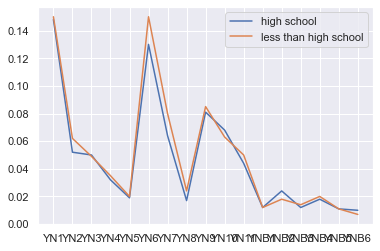

In [47]:
# We observe that those with less than high school level of education exhibited higher distrust in the vaccine, with a higher percent for each of our analyzed reasons.

fig, axs = plt.subplots()
axs.plot(Reason_ColList, pct_high, label="high school")
axs.plot(Reason_ColList, pct_lesshighschool, label="less than high school")
axs.legend()

plt.show()